In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\Datasets\Health_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:title={'center':'Age vs BMI'}, xlabel='Age', ylabel='BMI'>

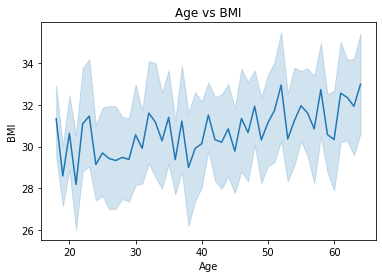

In [11]:
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age vs BMI")

sns.lineplot(x="age",y="bmi",data=df)

In [21]:
df1=df.copy()

In [39]:
females=df.loc[df["sex"]=="female"]
female_smokers=females.loc[females["smoker"]=="yes"]
female_smokers=female_smokers["sex"]
        
        

In [40]:
males=df.loc[df["sex"]=="male"]
male_smokers=males.loc[males["smoker"]=="yes"]
male_smokers=male_smokers["sex"]

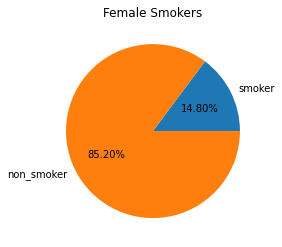

In [66]:
labels=["smoker","non_smoker"]
vals=[female_smokers.value_counts().sum(),df[df.sex=="female"].value_counts().sum()]
plt.title("Female Smokers")
plt.pie(vals,labels=labels,autopct="%0.2f%%")
plt.show()




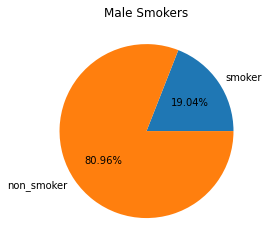

In [68]:
labels=["smoker","non_smoker"]
vals=[male_smokers.value_counts().sum(),df[df["sex"]=="male"].value_counts().sum()]
plt.title("Male Smokers")
plt.pie(vals,labels=labels,autopct="%0.2f%%")
plt.show()

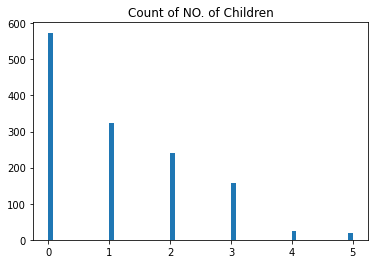

In [109]:
plt.title("Count of NO. of Children")

plt.hist(df["children"],bins=65)
plt.show()

<AxesSubplot:xlabel='age', ylabel='children'>

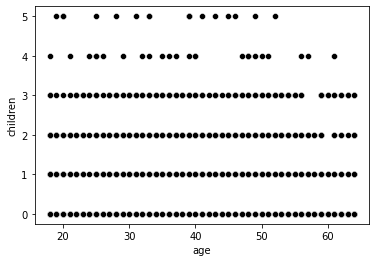

In [110]:
sns.scatterplot(x="age",y="children",data=df,color="k")

<AxesSubplot:xlabel='age', ylabel='charges'>

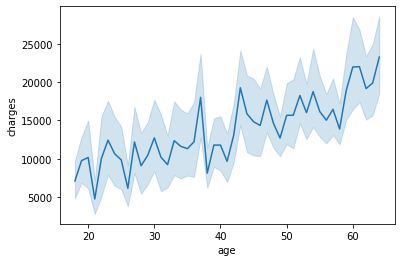

In [111]:
sns.lineplot(x="age",y="charges",data=df)

In [112]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

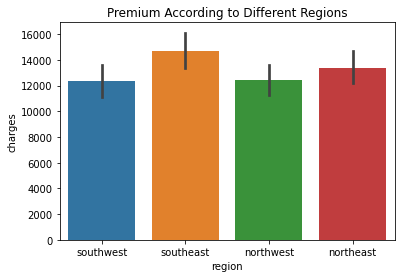

In [113]:
ax=plt.figure()

plt.title("Premium According to Different Regions")

ax=sns.barplot(x='region',y="charges",data=df)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='charges'>

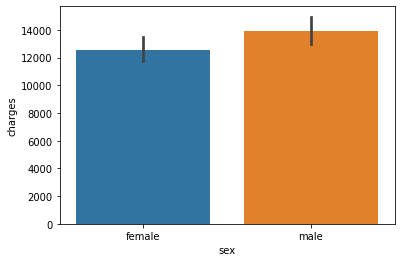

In [116]:
sns.barplot(x="sex",y="charges",data=df)

In [117]:
df["sex"]=df["sex"].map({"female":0,"male":1})
df["smoker"]=df["smoker"].map({"yes":1,"no":0})

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


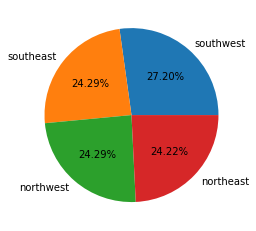

In [121]:


plt.pie(df["region"].value_counts(),labels=df["region"].unique(),autopct="%0.2f%%")
plt.show()

In [122]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [124]:
encoder.fit(df["region"])
df["region"]=encoder.transform(df["region"])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 68.1 KB


In [126]:
df["region"].unique()

array([3, 2, 1, 0])

In [128]:
from sklearn.model_selection import train_test_split


In [141]:
X=np.array(df[["age","children","bmi","sex","smoker","region"]])
X


y=np.array(df[["charges"]])
y



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [143]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [147]:
from sklearn.metrics import mean_squared_error

In [152]:
y_pred=regressor.predict(X_test)
y_pred
mean_squared_error(y_pred,y_test)

24613615.441851888

In [153]:
y_pred

array([15393.7808278 , 47030.693823  , 10822.4445515 ,  2583.4296155 ,
        7784.134997  ,  7393.0486219 , 10233.6527705 , 13115.2676922 ,
       18410.984424  , 34274.5995656 ,  5104.6617425 , 14243.6140313 ,
       10477.2258096 ,  2852.9850139 , 13548.2629828 , 12642.2229705 ,
        7746.8626297 ,  6175.9041437 ,  1880.2219135 , 11187.1891106 ,
       11213.0667989 ,  9727.3239637 ,  6127.1142675 , 11086.1791854 ,
        3845.7817835 ,  4004.640746  , 25176.0033995 ,  9638.3483426 ,
       18122.8516447 ,  6473.0346813 ,  2577.8265612 ,  3369.3286697 ,
       14412.7299319 ,  7141.4139392 ,  2181.6516865 , 12294.642199  ,
       13575.5747316 , 15689.3967645 ,  4414.6291124 ,  2068.247634  ,
       13767.741297  ,  8119.7315245 ,  8631.419954  ,  1648.425097  ,
        3619.6140742 , 45251.8939155 , 10192.8279638 , 39890.6629495 ,
        1728.218789  ,  4159.0543495 , 12342.7605568 , 14682.3741296 ,
        8491.4791673 , 39195.8707722 , 12059.5475776 , 10964.1563789 ,
      